
# ANALYSE DE SENTIMENT DES DONNEES DE ALLO CINE AVEC LE MODEL CAMEMBERT CASE

## IMPORT PACKAGES

In [5]:
import pandas as pd
import pandas as pd
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [6]:
metadata = {
    "train" : pd.read_csv("archive/train.csv", index_col=0),
    "test"  : pd.read_csv("archive/test.csv", index_col=0),
    "valid" : pd.read_csv("archive/valid.csv", index_col=0)
}

In [7]:
metadata["train"].head()

,film-url,review,polarity
0,http://www.allocine.fr/film/fichefilm-135259/c...,Si vous cherchez du cinéma abrutissant à tous ...,0
1,http://www.allocine.fr/film/fichefilm-172430/c...,"Trash, re-trash et re-re-trash...! Une horreur...",0
2,http://www.allocine.fr/film/fichefilm-15105/cr...,"Et si, dans les 5 premières minutes du film, l...",0
3,http://www.allocine.fr/film/fichefilm-188629/c...,Mon dieu ! Quelle métaphore filée ! Je suis ab...,0
4,http://www.allocine.fr/film/fichefilm-23514/cr...,"Premier film de la saga Kozure Okami, ""Le Sabr...",1




definition of a function that add labels on each text


In [8]:
metadata["train"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 160000 entries, 0 to 159999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   film-url  160000 non-null  object
 1   review    160000 non-null  object
 2   polarity  160000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.9+ MB


In [9]:
metadata["train"]["polarity"].value_counts()

polarity
1    80587
0    79413
Name: count, dtype: int64

In [10]:
map_lab = {1 : "positive",
           0 : "negative"}

In [11]:
def labling(x):
    return map_lab[x]

In [12]:
metadata["train"]["sentiment"] = metadata["train"]["polarity"].apply(lambda x : labling(x))

In [13]:
metadata["test"]["sentiment"] = metadata["test"]["polarity"].apply(lambda x : labling(x))

In [14]:
metadata["valid"]["sentiment"] = metadata["valid"]["polarity"].apply(lambda x : labling(x))

### Visualisation des données pour vérifier la répartion de la variable cible

In [15]:
custom_palette = {'positive': 'green', 'negative': 'red'}

In [16]:
def plot_target(df, target = "sentiment"):
    plt.figure(figsize = (5,5))
    sns.countplot(df, x = target, palette=custom_palette);
    plt.title(" Sentiment barplot ")
    plt.show()

C:\Users\ANSD\AppData\Local\Temp\ipykernel_13940\3467975184.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x = target, palette=custom_palette);


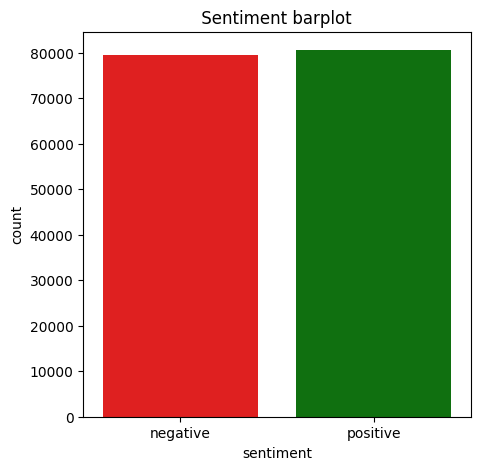

In [17]:
plot_target(metadata["train"])

C:\Users\ANSD\AppData\Local\Temp\ipykernel_13940\3467975184.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x = target, palette=custom_palette);


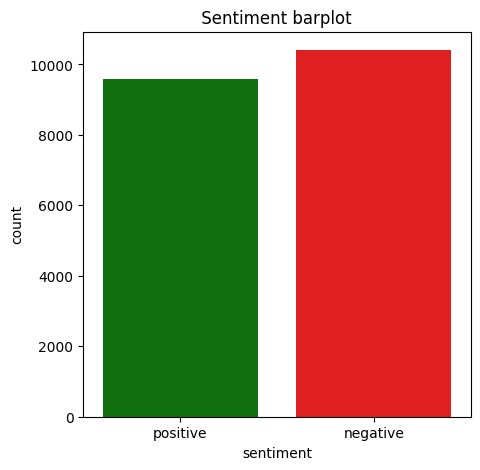

In [18]:
plot_target(metadata["test"])

Les données semblent équilibrées que ce soit dans l'échantillon d'apprentissage ou du test.

In [19]:
def find_non_apl_words(text):
    tokens = text.strip().split()
    return [t for t in tokens if not re.match(r'[^\W\d]*$', 
                                              t.translate(str.maketrans('', '', r'\.\"\,\?\!\@\'()'))
                                             )]

In [20]:
non_apha_num = []
non_apha_num = metadata["train"]['review'].apply(lambda x: find_non_apl_words(x))



In [21]:
non_apha_num

0         [buddy-movie, Rhys-meyers, narcissico-badass,c...
1         [re-trash, re-re-trash...!, Imaginez-vous, 20,...
2         [5, 100, balles…, «, », moment…, suicido-ferro...
3                            [2000,, 11, 2000, 2010),, 90,]
4                                                      [40]
                                ...                        
159995                                                   []
159996                                                   []
159997                                            [Hammer:]
159998                                                   []
159999                      [0/20., ----Novembre, 2013----]
Name: review, Length: 160000, dtype: object

In [23]:
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator